In [ ]:
%matplotlib inline
from yahoo_finance import Share
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

In [3]:

#yahoo = Share('YHOO')
yahoo = Share('YHO.F')

In [4]:
print(yahoo.get_open())

37.47
32.925


In [5]:
today = dt.datetime.today().date() # now would be the same
years_ago = dt.datetime.now().date() - relativedelta(years=5)
print(today)
print(years_ago)

2016-04-15
2011-04-15


In [7]:
hist = yahoo.get_historical(str(years_ago), str(today))

In [13]:
df_yahoo = pd.DataFrame(hist)
print (df_yahoo)

      Adj_Close      Close        Date       High        Low       Open  \
0     37.169998  37.169998  2016-04-14      37.50  36.849998  37.470001   
1     37.310001  37.310001  2016-04-13  37.349998  36.900002  36.939999   
2         36.66      36.66  2016-04-12  36.830002  36.279999  36.650002   
3         36.48      36.48  2016-04-11  36.849998      36.32  36.380001   
4         36.07      36.07  2016-04-08  36.919998  35.619999  36.849998   
5     36.169998  36.169998  2016-04-07      37.25  35.720001  35.860001   
6         36.66      36.66  2016-04-06      37.00  36.310001  36.400002   
7         36.41      36.41  2016-04-05  36.919998  36.220001  36.700001   
8         37.02      37.02  2016-04-04      37.50  36.540001  36.549999   
9         36.48      36.48  2016-04-01  36.880001  36.310001  36.540001   
10    36.810001  36.810001  2016-03-31      37.02      36.50  36.509998   
11    36.560001  36.560001  2016-03-30  37.279999  36.439999  36.610001   
12        36.32      36.3

In [10]:
#df_yahoo.index = pd.to_datetime(df_yahoo.pop('Date'))
#df_yahoo.head()

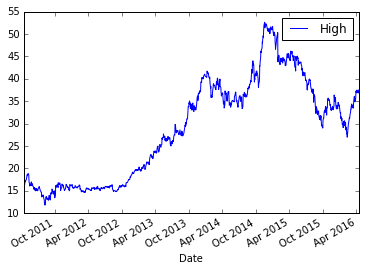

In [19]:

df_yahoo['High'] = df_yahoo['High'].astype('float')
df_yahoo['Volume'] = df_yahoo['Volume'].astype('int')
df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date'])
#df_yahoo = pd.to_numeric(df_yahoo, errors='coerce')
df_yahoo.dtypes
df_yahoo.plot(x='Date', y='High')
#df_yahoo.plot(x='Date', y='Volume')

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-04-01', '2016-04-04', '2016-04-05', '2016-04-06',
               '2016-04-07', '2016-04-08', '2016-04-11', '2016-04-12',
               '2016-04-13', '2016-04-14'],
              dtype='datetime64[ns]', name='Date', length=1634, freq=None)


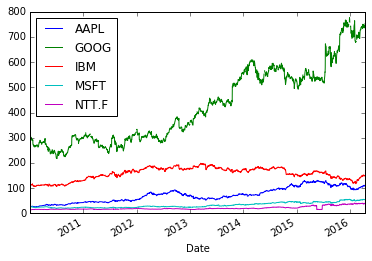

In [47]:


#import pandas.io.data as web
import pandas as pd
import pandas_datareader.data as web

all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG', 'NTT.F']:
    all_data[ticker] = web.get_data_yahoo(ticker)
    
price = pd.DataFrame({tic: data['Adj Close']
                    for tic, data in all_data.items()})
                

    
price.plot()

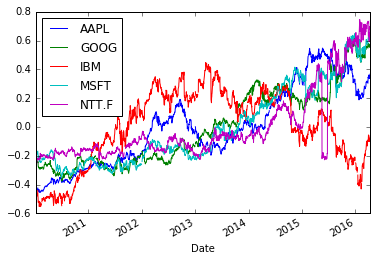

In [68]:
price_norm = (price - price.mean()) / (price.max() - price.min())
price_norm.plot()

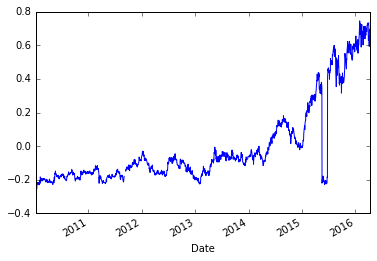

In [67]:
norm_ntt = (price['NTT.F'] - price['NTT.F'].mean()) / (price['NTT.F'].max() - price['NTT.F'].min() ) 
norm_ntt.plot()

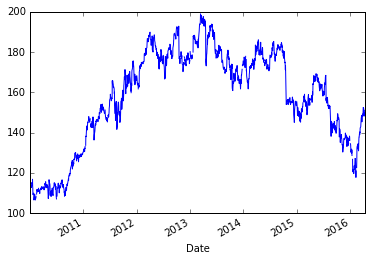

In [75]:
import matplotlib.pyplot as plt
norm_ibm = (price['IBM'] - price['IBM'].mean()) / (price['IBM'].max() - price['IBM'].min() ) 
norm_ibm.plot()
plt.clf()
price['IBM'].plot()